# Dataset

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import numpy as np
from ipywidgets import interact
from tqdm import tqdm

from mri_processing import *

In [3]:
def explore_3D_array_comparison(arr_before: np.ndarray, arr_after: np.ndarray, cmap: str = 'gray'):

  assert arr_after.shape == arr_before.shape

  def fn(SLICE):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,10))

    ax1.set_title('Before', fontsize=15)
    ax1.imshow(arr_before[SLICE, :, :], cmap=cmap, origin='lower')

    ax2.set_title('After', fontsize=15)
    ax2.imshow(arr_after[SLICE, :, :], cmap=cmap, origin='lower')

    plt.tight_layout()

  interact(fn, SLICE=(0, arr_before.shape[0]-1))

In [4]:
def zero_pad_data(data, target_size=396):
    _, _, h, w = data.shape
    if w >= target_size and h >= target_size:
        return data
    
    pad_w = (target_size - w) // 2
    pad_h = (target_size - h) // 2
    
    pad = (pad_h, pad_h + (target_size - h) % 2, pad_w, pad_w + (target_size - w) % 2)

    padded_data = F.pad(data, pad, mode='constant', value=0)
    return padded_data

In [5]:
def process_dict(data_dict):
    for key, volume in tqdm(data_dict.items(), desc="Processing volumes"):
        height, width = volume.shape[-2:]
        h_from = (height - width) // 2
        h_to = h_from + width
        volume = volume[:, :, h_from:h_to, :]
        if volume.shape[0] > 10:
            volume = volume[:10]
        padded_data = zero_pad_data(fft2c(torch.from_numpy(volume)))
        volume = rss_coil_combine(ifft2c(padded_data).numpy())
        for i in range(volume.shape[0]): 
            volume[i, :, :] = minmax_normalization(volume[i, :, :])
        data_dict[key] = volume
    return data_dict

In [6]:
def save_data(data_dict, folder_name):
    root_dir = os.path.join(os.getcwd(), 'data')
    output_dir = os.path.join(root_dir, folder_name)
    os.makedirs(output_dir, exist_ok=True) 
    for key, volume in tqdm(data_dict.items(), desc="Save volumes"):
        file_path = os.path.join(output_dir, f"{key}.npy")
        np.save(file_path, volume)

def load_data(folder_name):
    root_dir = os.path.join(os.getcwd(), 'data')
    output_dir = os.path.join(root_dir, folder_name)

    data_dict = {}

    for file_name in os.listdir(output_dir):
        if file_name.endswith('.npy'):
            key = os.path.splitext(file_name)[0]
            data_dict[key] = np.load(os.path.join(output_dir, file_name), allow_pickle=True)

    print(len(data_dict))
    return data_dict

# Dropbox

In [7]:
from load_data.load_from_dropbox import *

In [8]:
def upload_folder_to_dropbox(local_folder, dropbox_folder):
    dbx = dropbox_connect()

    for root, dirs, files in os.walk(local_folder):
        relative_path = os.path.relpath(root, local_folder)
        dropbox_path = os.path.join(dropbox_folder, relative_path).replace("\\", "/")
        
        if relative_path != ".":
            try:
                dbx.files_create_folder(dropbox_path)
            except dropbox.exceptions.ApiError as e:
                if e.error.is_path() and isinstance(e.error.get_path().is_conflict(), dropbox.files.FolderConflictError):
                    pass  

        for file_name in files:
            local_file_path = os.path.join(root, file_name)
            dropbox_file_path = os.path.join(dropbox_path, file_name).replace("\\", "/")
            
            with open(local_file_path, "rb") as f:
                print(f"Uploading {file_name} to {dropbox_file_path}")
                dbx.files_upload(f.read(), dropbox_file_path, mode=dropbox.files.WriteMode("overwrite"))

## t1 (134)

In [ ]:
dbx = dropbox_connect()
t1_clear = load_npy_from_dropbox(dbx, '/Clear_data_notrans_t1_1114_select_clear')
print(f"Loaded {len(t1_clear)} npy files.") #134
t1_clear = process_dict(t1_clear)

Loaded 134 npy files.


In [ ]:
dbx = dropbox_connect()
t1_g1 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1_1115_g1')
print(f"Loaded {len(t1_g1)} npy files.") #134
t1_g1 = process_dict(t1_g1)

Loaded 134 npy files.


In [ ]:
dbx = dropbox_connect()
t1_g2 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1_1115_g2')
print(f"Loaded {len(t1_g2)} npy files.") #134
t1_g2 = process_dict(t1_g2)

Loaded 134 npy files.


In [ ]:
dbx = dropbox_connect()
t1_g3 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1_1115_g3')
print(f"Loaded {len(t1_g3)} npy files.") #134
t1_g3 = process_dict(t1_g3)

Loaded 134 npy files.


In [ ]:
dbx = dropbox_connect()
t1_g4 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1_1115_g4')
print(f"Loaded {len(t1_g4)} npy files.") #134
t1_g4 = process_dict(t1_g4)

Loaded 134 npy files.


In [ ]:
dbx = dropbox_connect()
t1_g5 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1_1115_g5')
print(f"Loaded {len(t1_g5)} npy files.") #134
t1_g5 = process_dict(t1_g5)

Loaded 134 npy files.


## flair (119)

In [ ]:
dbx = dropbox_connect()
flair_clear = load_npy_from_dropbox(dbx, '/Clear_data_notrans_flair_1114_select_clear')
print(f"Loaded {len(flair_clear)} npy files.") #119
flair_clear = process_dict(flair_clear)

Loaded 119 npy files.


In [ ]:
dbx = dropbox_connect()
flair_g1 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_flair_1115_g1')
print(f"Loaded {len(flair_g1)} npy files.")
flair_g1 = process_dict(flair_g1)

Loaded 119 npy files.


In [21]:
dbx = dropbox_connect()
flair_g2 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_flair_1115_g2')
print(f"Loaded {len(flair_g2)} npy files.") 
flair_g2 = process_dict(flair_g2)

Loaded 119 npy files.


Processing volumes: 100%|██████████| 119/119 [10:41<00:00,  5.39s/it]


In [23]:
dbx = dropbox_connect()
flair_g3 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_flair_1115_g3')
print(f"Loaded {len(flair_g3)} npy files.") 
flair_g3 = process_dict(flair_g3)

Loaded 119 npy files.


Processing volumes: 100%|██████████| 119/119 [10:44<00:00,  5.42s/it]


In [ ]:
dbx = dropbox_connect()
flair_g4 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_flair_1115_g4')
print(f"Loaded {len(flair_g4)} npy files.") 
flair_g4 = process_dict(flair_g4)

In [7]:
dbx = dropbox_connect()
flair_g5 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_flair_1115_g5')
print(f"Loaded {len(flair_g5)} npy files.") 
flair_g5 = process_dict(flair_g5)

Loaded 119 npy files.


Processing volumes: 100%|██████████| 119/119 [02:03<00:00,  1.04s/it]


## t1post (105)

In [9]:
dbx = dropbox_connect()
t1post_clear = load_npy_from_dropbox(dbx, '/Clear_data_notrans_t1post_1114_select_clear')
print(f"Loaded {len(t1post_clear)} npy files.")
t1post_clear = process_dict(t1post_clear)
save_data(t1post_clear, "t1post_clear")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 158.51it/s]


In [10]:
dbx = dropbox_connect()
t1post_g1 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1post_1115_g1')
print(f"Loaded {len(t1post_g1)} npy files.") 
t1post_g1 = process_dict(t1post_g1)
save_data(t1post_g1, "t1post_g1")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 137.78it/s]


In [11]:
dbx = dropbox_connect()
t1post_g2 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1post_1115_g2')
print(f"Loaded {len(t1post_g2)} npy files.") 
t1post_g2 = process_dict(t1post_g2)
save_data(t1post_g2, "t1post_g2")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 146.12it/s]


In [12]:
dbx = dropbox_connect()
t1post_g3 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1post_1115_g3')
print(f"Loaded {len(t1post_g3)} npy files.") 
t1post_g3 = process_dict(t1post_g3)
save_data(t1post_g3, "t1post_g3")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 156.36it/s]


In [13]:
dbx = dropbox_connect()
t1post_g4 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1post_1115_g4')
print(f"Loaded {len(t1post_g4)} npy files.") 
t1post_g4 = process_dict(t1post_g4)
save_data(t1post_g4, "t1post_g4")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 141.38it/s]


In [14]:
dbx = dropbox_connect()
t1post_g5 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t1post_1115_g5')
print(f"Loaded {len(t1post_g5)} npy files.") 
t1post_g5 = process_dict(t1post_g5)
save_data(t1post_g5, "t1post_g5")

Loaded 105 npy files.


Save volumes: 100%|██████████| 105/105 [00:00<00:00, 142.13it/s]


## t2 (100)

In [15]:
dbx = dropbox_connect()
t2_clear = load_npy_from_dropbox(dbx, '/Clear_data_notrans_t2_1114_select_clear')
print(f"Loaded {len(t2_clear)} npy files.") #100
t2_clear = process_dict(t2_clear)
save_data(t2_clear, "t2_clear")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 140.07it/s]


In [16]:
dbx = dropbox_connect()
t2_g1 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t2_1115_g1')
print(f"Loaded {len(t2_g1)} npy files.") #100
t2_g1 = process_dict(t2_g1)
save_data(t2_g1, "t2_g1")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 135.54it/s]


In [17]:
dbx = dropbox_connect()
t2_g2 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t2_1115_g2')
print(f"Loaded {len(t2_g2)} npy files.") #100
t2_g2 = process_dict(t2_g2)
save_data(t2_g2, "t2_g2")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 147.16it/s]


In [18]:
dbx = dropbox_connect()
t2_g3 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t2_1115_g3')
print(f"Loaded {len(t2_g3)} npy files.") #100
t2_g3 = process_dict(t2_g3)
save_data(t2_g3, "t2_g3")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 152.25it/s]


In [19]:
dbx = dropbox_connect()
t2_g4 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t2_1115_g4')
print(f"Loaded {len(t2_g4)} npy files.") #100
t2_g4 = process_dict(t2_g4)
save_data(t2_g4, "t2_g4")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 173.60it/s]


In [20]:
dbx = dropbox_connect()
t2_g5 = load_npy_from_dropbox(dbx, '/Motion_data_140line_notrans_t2_1115_g5')
print(f"Loaded {len(t2_g5)} npy files.") #100
t2_g5 = process_dict(t2_g5)
save_data(t2_g5, "t2_g5")

Loaded 100 npy files.


Save volumes: 100%|██████████| 100/100 [00:00<00:00, 172.53it/s]


# Metric

In [ ]:
from calculate_metric.calculate_iqm import *
from calculate_metric.calculate_lpips import compute_lpips

2024-11-29 03:21:22.554763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732850482.568603    5723 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732850482.572804    5723 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# compute_lpips("t1")
# compute_lpips("t1post")
# compute_lpips("t2")
# compute_lpips("flair")

In [ ]:
df_t1post_g3 = calculate_iqm(t1post_clear, t1post_g3, folder_name="t1post_g3")
df_t1post_g3.to_csv('t1post_g3_iqm.csv', index=False)

Processing keys: 100%|██████████| 105/105 [2:52:17<00:00, 98.45s/it]  


In [25]:
calculate_iqm_time(t1post_clear, t1post_g5)

/root/motioncorrection/vsi.py:62: UserWarning: The original VSI supports only RGB images. The input images were converted to RGB by copying the grey channel 3 times.
  warnings.warn('The original VSI supports only RGB images. The input images were converted to RGB by copying '


Slice 0: HaarPSI: 0.026864s, VSI: 2.227895s, VIF: 0.105441s, NQM: 0.075503s
Slice 1: HaarPSI: 0.043069s, VSI: 3.188500s, VIF: 0.098878s, NQM: 0.143986s
Slice 2: HaarPSI: 0.025591s, VSI: 2.815951s, VIF: 0.098517s, NQM: 0.069881s
Slice 3: HaarPSI: 0.034050s, VSI: 2.717525s, VIF: 0.286741s, NQM: 0.070304s
Slice 4: HaarPSI: 0.028859s, VSI: 1.597028s, VIF: 0.097053s, NQM: 0.072448s
Slice 5: HaarPSI: 0.028511s, VSI: 2.103747s, VIF: 0.203822s, NQM: 0.151679s
Slice 6: HaarPSI: 0.026410s, VSI: 3.315614s, VIF: 0.099177s, NQM: 0.068837s
Slice 7: HaarPSI: 0.029052s, VSI: 2.590781s, VIF: 0.101439s, NQM: 0.071635s
Slice 8: HaarPSI: 0.029613s, VSI: 1.713358s, VIF: 0.184042s, NQM: 0.069362s
Slice 9: HaarPSI: 0.028555s, VSI: 2.708061s, VIF: 0.099533s, NQM: 0.070419s
Slice 10: HaarPSI: 0.028651s, VSI: 3.301062s, VIF: 0.107145s, NQM: 0.140044s
Slice 11: HaarPSI: 0.025955s, VSI: 4.233188s, VIF: 0.193908s, NQM: 0.153963s
Slice 12: HaarPSI: 0.027451s, VSI: 2.807444s, VIF: 0.098870s, NQM: 0.070369s
Slice 13:

### motion

parameter 2d 기준
[translation y방향, translation x방향, 0, rotation yaw, 0,0]

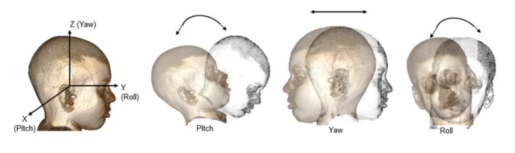

# Dataloader

In [13]:
from load_data.dataset import CustomDataset
import torch
import matplotlib.pyplot as plt

In [9]:
dbx = dropbox_connect()
t1post_clear = load_npy_from_dropbox(dbx, '/simulation_data/t1post_clear')
print(f"Loaded {len(t1post_clear)} npy files.")
t1post_g1 = load_npy_from_dropbox(dbx, '/simulation_data/t1post_g1')
print(f"Loaded {len(t1post_g1)} npy files.")
t1post_g2 = load_npy_from_dropbox(dbx, '/simulation_data/t1post_g2')
print(f"Loaded {len(t1post_g2)} npy files.")
t1post_g3 = load_npy_from_dropbox(dbx, '/simulation_data/t1post_g3')
print(f"Loaded {len(t1post_g3)} npy files.")
t1post_g4 = load_npy_from_dropbox(dbx, '/simulation_data/t1post_g4')
print(f"Loaded {len(t1post_g4)} npy files.")
t1post_g5 = load_npy_from_dropbox(dbx, '/simulation_data/t1post_g5')
print(f"Loaded {len(t1post_g5)} npy files.")

Loaded 105 npy files.
Loaded 105 npy files.
Loaded 105 npy files.
Loaded 105 npy files.
Loaded 105 npy files.
Loaded 105 npy files.


In [14]:
save_data(t1post_clear, "t1post_clear")
save_data(t1post_g1, "t1post_g1")
save_data(t1post_g2, "t1post_g2")
save_data(t1post_g3, "t1post_g3")
save_data(t1post_g4, "t1post_g4")
save_data(t1post_g5, "t1post_g5")

Save volumes: 100%|██████████| 105/105 [00:00<00:00, 205.61it/s]


In [10]:
dbx = dropbox_connect()
t1_clear = load_npy_from_dropbox(dbx, '/simulation_data/t1_clear')
print(f"Loaded {len(t1_clear)} npy files.")
t1_g1 = load_npy_from_dropbox(dbx, '/simulation_data/t1_g1')
print(f"Loaded {len(t1_g1)} npy files.")
t1_g2 = load_npy_from_dropbox(dbx, '/simulation_data/t1_g2')
print(f"Loaded {len(t1_g2)} npy files.")
t1_g3 = load_npy_from_dropbox(dbx, '/simulation_data/t1_g3')
print(f"Loaded {len(t1_g3)} npy files.")
t1_g4 = load_npy_from_dropbox(dbx, '/simulation_data/t1_g4')
print(f"Loaded {len(t1_g4)} npy files.")
t1_g5 = load_npy_from_dropbox(dbx, '/simulation_data/t1_g5')
print(f"Loaded {len(t1_g5)} npy files.")

Loaded 134 npy files.
Loaded 134 npy files.
Loaded 134 npy files.
Loaded 134 npy files.
Loaded 134 npy files.
Loaded 134 npy files.


In [15]:
save_data(t1_clear, "t1_clear")
save_data(t1_g1, "t1_g1")
save_data(t1_g2, "t1_g2")
save_data(t1_g3, "t1_g3")
save_data(t1_g4, "t1_g4")
save_data(t1_g5, "t1_g5")

Save volumes: 100%|██████████| 134/134 [00:00<00:00, 192.04it/s]


In [11]:
dbx = dropbox_connect()
t2_clear = load_npy_from_dropbox(dbx, '/simulation_data/t2_clear')
print(f"Loaded {len(t2_clear)} npy files.")
t2_g1 = load_npy_from_dropbox(dbx, '/simulation_data/t2_g1')
print(f"Loaded {len(t2_g1)} npy files.")
t2_g2 = load_npy_from_dropbox(dbx, '/simulation_data/t2_g2')
print(f"Loaded {len(t2_g2)} npy files.")
t2_g3 = load_npy_from_dropbox(dbx, '/simulation_data/t2_g3')
print(f"Loaded {len(t2_g3)} npy files.")
t2_g4 = load_npy_from_dropbox(dbx, '/simulation_data/t2_g4')
print(f"Loaded {len(t2_g4)} npy files.")
t2_g5 = load_npy_from_dropbox(dbx, '/simulation_data/t2_g5')
print(f"Loaded {len(t2_g5)} npy files.")

Loaded 100 npy files.
Loaded 100 npy files.
Loaded 100 npy files.
Loaded 100 npy files.
Loaded 100 npy files.
Loaded 100 npy files.


In [16]:
save_data(t2_clear, "t2_clear")
save_data(t2_g1, "t2_g1")
save_data(t2_g2, "t2_g2")
save_data(t2_g3, "t2_g3")
save_data(t2_g4, "t2_g4")
save_data(t2_g5, "t2_g5")

Save volumes: 100%|██████████| 100/100 [00:00<00:00, 177.27it/s]


In [12]:
dbx = dropbox_connect()
flair_clear = load_npy_from_dropbox(dbx, '/simulation_data/flair_clear')
print(f"Loaded {len(flair_clear)} npy files.")
flair_g1 = load_npy_from_dropbox(dbx, '/simulation_data/flair_g1')
print(f"Loaded {len(flair_g1)} npy files.")
flair_g2 = load_npy_from_dropbox(dbx, '/simulation_data/flair_g2')
print(f"Loaded {len(flair_g2)} npy files.")
flair_g3 = load_npy_from_dropbox(dbx, '/simulation_data/flair_g3')
print(f"Loaded {len(flair_g3)} npy files.")
flair_g4 = load_npy_from_dropbox(dbx, '/simulation_data/flair_g4')
print(f"Loaded {len(flair_g4)} npy files.")
flair_g5 = load_npy_from_dropbox(dbx, '/simulation_data/flair_g5')
print(f"Loaded {len(flair_g5)} npy files.")

Loaded 119 npy files.
Loaded 119 npy files.
Loaded 119 npy files.
Loaded 119 npy files.
Loaded 119 npy files.
Loaded 119 npy files.


In [17]:
save_data(flair_clear, "flair_clear")
save_data(flair_g1, "flair_g1")
save_data(flair_g2, "flair_g2")
save_data(flair_g3, "flair_g3")
save_data(flair_g4, "flair_g4")
save_data(flair_g5, "flair_g5")

Save volumes: 100%|██████████| 119/119 [00:00<00:00, 200.13it/s]


In [18]:
if __name__ == "__main__":
    csv_path = "/root/motioncorrection/iqm_csv/fr-iqm.csv"
    iqm_label = "VIF"
    train_dataset = CustomDataset(csv_path, iqm_label)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=24, shuffle=True)
    # for x, y, sequence in train_loader:
    #     print(x.shape, y, sequence) 
    x, y1, y2 = next(iter(train_loader))
    print(x.shape, y1, y2)
    print(y1.shape)

torch.Size([27480, 1, 396, 396])
Read 27480 records
torch.Size([24, 1, 396, 396]) tensor([ 69.,  90.,  57.,  85.,  50.,  52.,  53.,  55.,  53.,  58.,  75.,  77.,
         84.,  49.,  69.,  74.,  84.,  45.,  65., 100.,  77.,  85.,  51., 100.]) ('t2', 't1', 'flair', 't1post', 'flair', 't1', 't1post', 't2', 't1post', 't1post', 't2', 't2', 't1', 'flair', 't1post', 't1post', 'flair', 'flair', 't1', 't2', 't1post', 't1', 't2', 't1post')
torch.Size([24])


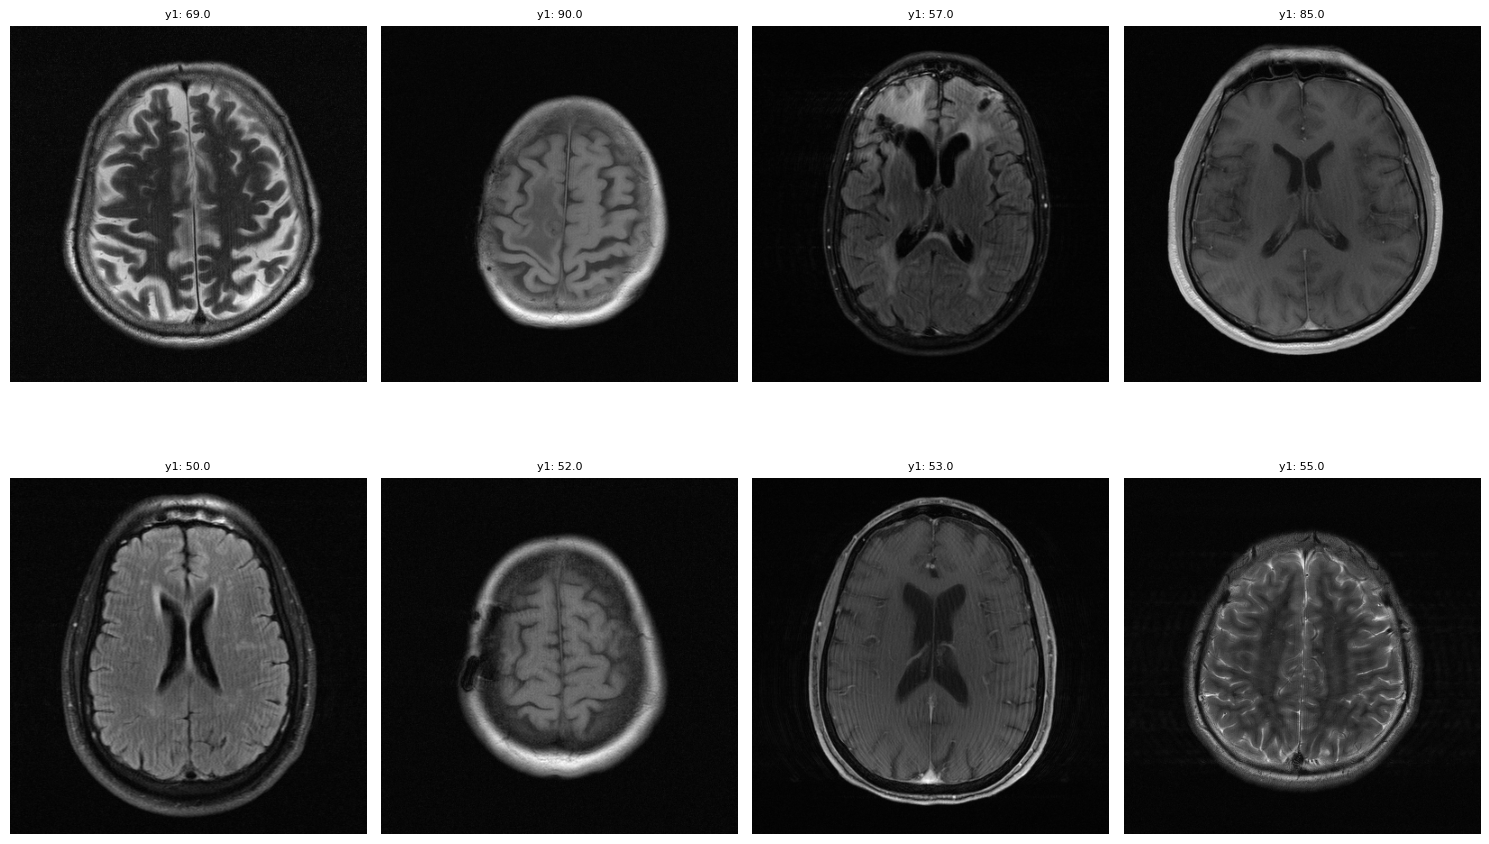

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # Adjust figsize for better visualization

for i, ax in enumerate(axes.flatten()):  # Flatten the 2D array of axes
    ax.imshow(x[i][0], cmap='gray', origin='lower')  # Show the first channel (assume grayscale)
    ax.axis('off')  # Turn off axis
    ax.set_title(f"y1: {y1[i].item()}", fontsize=8)  # Add y1 as the title

plt.tight_layout()
plt.show()